In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import statsmodels.api as sm

In [2]:
# File created: Jan. 5 2019
# Tutorial Reference
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [3]:
# Dataset:
# Consumer Price Index for All Urban Consumers: All Items
# Citation:
# U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], 
# retrieved from FRED, Federal Reserve Bank of St. Louis;
# https://fred.stlouisfed.org/series/CPIAUCSL, January 4, 2019.

In [68]:
import datetime
# Timeit module.
def timeit(method):
    def timed(*args, **kw):
        ts = datetime.datetime.now()
        result = method(*args, **kw)
        te = datetime.datetime.now()
        print(f"Time: {te - ts}")
        return result
    return timed

In [142]:
df = pd.read_csv("./data/CPIAUCSL.csv", index_col=0, parse_dates=True)
# df["DATE"] = pd.to_datetime(df["DATE"])
df.columns = ["CPI"]
print(df.dtypes)
df.head()
# month_df = df.resample("M").mean().head()

CPI    float64
dtype: object


,CPI
DATE,
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
1947-06-01,22.08


In [143]:
# 1st order differencing.
d1 = df.diff()
d1.dropna(inplace=True)
d1.head()

,CPI
DATE,
1947-03-01,0.38
1947-04-01,0.00
1947-05-01,-0.05
1947-06-01,0.13
1947-07-01,0.15


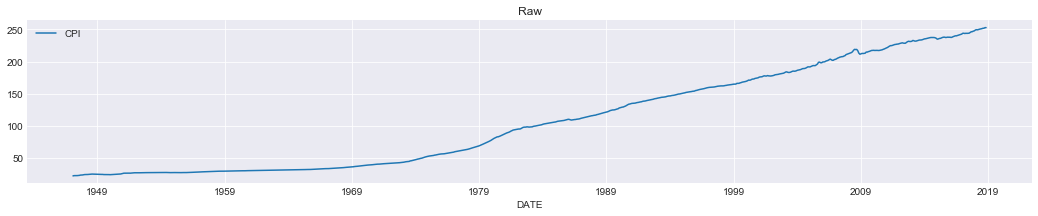

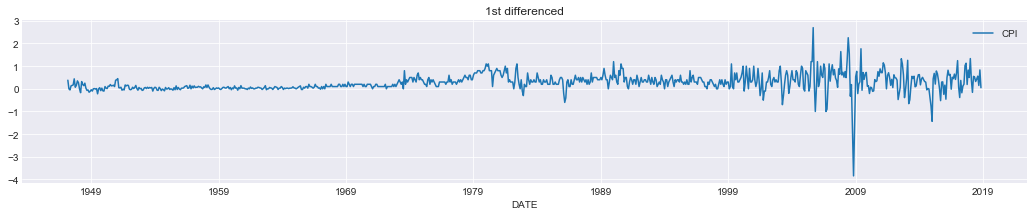

In [144]:
df.plot(figsize=(18, 3), grid=True)
plt.title("Raw")
plt.show()
d1.plot(figsize=(18, 3), grid=True)
plt.title("1st differenced")
plt.show()

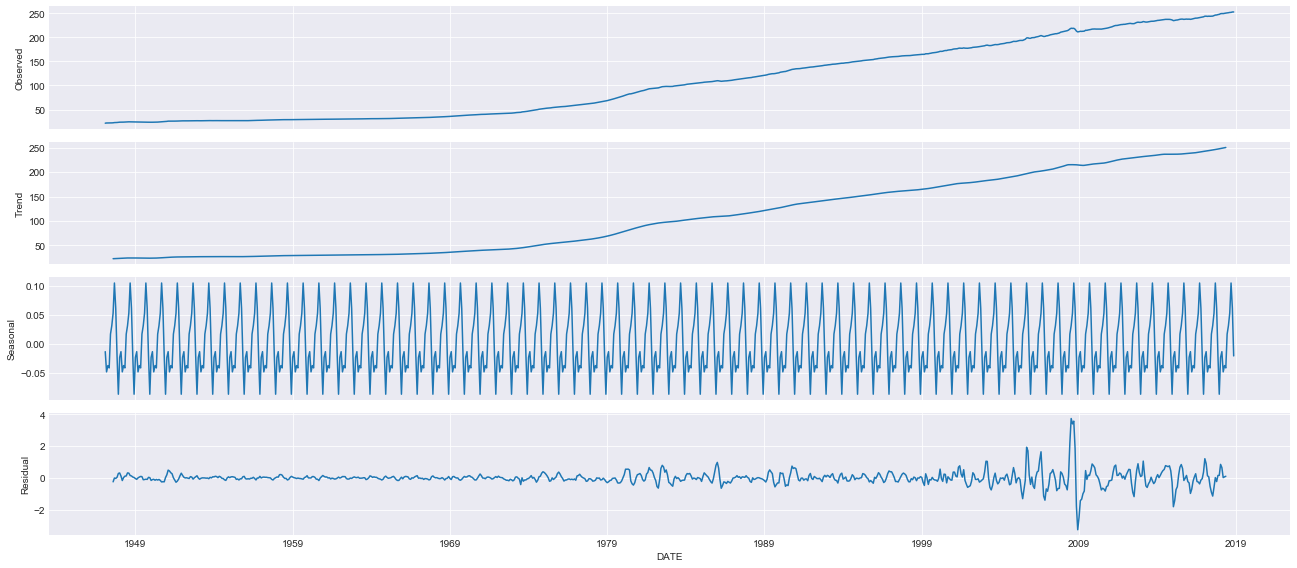

In [145]:
from pylab import rcParams
rcParams["figure.figsize"] = (18, 8)
rcParams["axes.grid"] = True
decomposition = sm.tsa.seasonal_decompose(df, model="additive")
fig = decomposition.plot()
plt.show()

In [146]:
# Grid Searching for Parameters
p = d = q = range(3)
pdq_set = tuple(itertools.product(p, d, q))
seasonal_pdq_set = (
    (x[0], x[1], x[2], 12)
    for x in list(itertools.product(p, d, q))
)
candidates = list()

for param in pdq_set:
    for param_seasonal in seasonal_pdq_set:
        model = sm.tsa.statespace.SARIMAX(
            df,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False,
            freq="MS"
        )
        candidates.append({
            "pdq": param,
            "seasonal_pdq": param_seasonal,
            "aic":results.aic
        })
        results = model.fit()
        print(f"ARIMA{param}x{param_seasonal} - AIC:{results.aic}")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:10856.72760859943
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:9616.875114131946
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:8475.23538083527
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:4806.899759889123
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:4249.371048565861
ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:3996.889427126568
ARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:3757.4399697071667
ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:3481.8945121835604
ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:3419.529905464437
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:3897.5317784312224


KeyboardInterrupt: 

In [147]:
# Grid Searching for Parameters
p = q = range(10)
d = [1]
pdq_set = tuple(itertools.product(p, d, q))
candidates = list()

for param in pdq_set:
    try:
        model = sm.tsa.statespace.SARIMAX(
            df,
            order=param,
            enforce_stationarity=False,
            enforce_invertibility=False,
            freq="MS"
        )
        candidates.append({
            "pdq": param,
            "aic": results.aic
        })
        results = model.fit()
        print(f"ARIMA{param} - AIC:{results.aic}")
    except:
        continue

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 1, 0) - AIC:1152.849221855989
ARIMA(0, 1, 1) - AIC:775.7353308514128
ARIMA(0, 1, 2) - AIC:688.1352336304842
ARIMA(0, 1, 3) - AIC:678.1233049260942
ARIMA(0, 1, 4) - AIC:652.7471576924063
ARIMA(0, 1, 5) - AIC:630.6435514764958
ARIMA(0, 1, 6) - AIC:626.1354155886982
ARIMA(0, 1, 7) - AIC:625.1371274735936
ARIMA(0, 1, 8) - AIC:619.4881258912593
ARIMA(0, 1, 9) - AIC:615.7426736131241
ARIMA(1, 1, 0) - AIC:628.9852899245697
ARIMA(1, 1, 1) - AIC:630.2251496177593
ARIMA(1, 1, 2) - AIC:507.3922861352229
ARIMA(1, 1, 3) - AIC:500.6651932245794
ARIMA(1, 1, 4) - AIC:500.64924989549843
ARIMA(1, 1, 5) - AIC:502.26205256889125
ARIMA(1, 1, 6) - AIC:503.9130658089538
ARIMA(1, 1, 7) - AIC:504.7287391110848
ARIMA(1, 1, 8) - AIC:506.04816456663394
ARIMA(1, 1, 9) - AIC:508.2109349815429
ARIMA(2, 1, 0) - AIC:630.51836928154
ARIMA(2, 1, 1) - AIC:631.8789461393541
ARIMA(2, 1, 2) - AIC:502.4687558529081
ARIMA(2, 1, 3) - AIC:499.92480031817354
ARIMA(2, 1, 4) - AIC:505.3836661695682
ARIMA(2, 1, 5) - AIC:50

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 7) - AIC:506.80305603895306
ARIMA(2, 1, 8) - AIC:508.0980157940482


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 9) - AIC:510.1400379307859
ARIMA(3, 1, 0) - AIC:599.4685741298067
ARIMA(3, 1, 1) - AIC:502.07082875495917


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2) - AIC:503.3772745676825


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3) - AIC:501.8141132765267


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 4) - AIC:501.650236841862
ARIMA(3, 1, 5) - AIC:493.9829874134623


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 6) - AIC:485.1627722046778


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 7) - AIC:503.0587934126178


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 8) - AIC:500.99486976780986


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 9) - AIC:506.77518178978255
ARIMA(4, 1, 0) - AIC:579.0176786530259
ARIMA(4, 1, 1) - AIC:503.71178109839224
ARIMA(4, 1, 2) - AIC:506.2874270253644


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3) - AIC:500.54988493217223


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 4) - AIC:501.9328355075644


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 5) - AIC:495.6991740143279


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 6) - AIC:504.3947422013316


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 7) - AIC:502.94841970447237


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 8) - AIC:500.01301856037657


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 9) - AIC:502.5207028115282
ARIMA(5, 1, 0) - AIC:578.7713200101989


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 1) - AIC:505.25028928544424
ARIMA(5, 1, 2) - AIC:508.320782771591


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 3) - AIC:502.76178373391264


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 4) - AIC:506.28461191602514


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 5) - AIC:502.0397109502205


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 6) - AIC:502.2008147582834


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 7) - AIC:505.0402788540635


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 8) - AIC:502.4107162308558


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(5, 1, 9) - AIC:508.1246595701332
ARIMA(6, 1, 0) - AIC:569.681042180558


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 1) - AIC:503.8888958979021


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 2) - AIC:507.48488285636273


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3) - AIC:507.9216399928971


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 4) - AIC:513.7387826127492


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 5) - AIC:508.58554756969426


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 6) - AIC:502.0335785489864


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 7) - AIC:506.0668988117678


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 8) - AIC:474.02743051404826


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 9) - AIC:487.84831738434684
ARIMA(7, 1, 0) - AIC:560.9375031068159


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 1) - AIC:505.51911559383575


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 2) - AIC:505.78474733843564


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 3) - AIC:511.46924193081577


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 4) - AIC:510.7621162358057


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 5) - AIC:505.71082329801925


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 6) - AIC:491.146176936144


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 7) - AIC:496.3105685529828


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 8) - AIC:488.98636906180275


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 9) - AIC:492.5951518503314
ARIMA(8, 1, 0) - AIC:559.1107319296322


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 1) - AIC:506.6823186247308


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 2) - AIC:506.41629807786535


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 3) - AIC:505.2021653668753


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 4) - AIC:790.3833598850327


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 5) - AIC:513.6226770181772


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 6) - AIC:491.3668003349509


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 7) - AIC:488.18224936298304


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 8) - AIC:491.2893425772721


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(8, 1, 9) - AIC:494.5117179428923
ARIMA(9, 1, 0) - AIC:547.4351705900419


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 1) - AIC:510.39322930973987


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 2) - AIC:508.1293923508338


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 3) - AIC:512.3868660668444


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 4) - AIC:1206.1851580503203


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 5) - AIC:512.7222068450883


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 6) - AIC:483.61282076626645


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 7) - AIC:471.334510854546


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(9, 1, 8) - AIC:472.4983434075807
ARIMA(9, 1, 9) - AIC:467.11841608757095


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [148]:
candidates.sort(key=lambda x:x["aic"])
from pprint import pprint
pprint(candidates[:5])
best_param = candidates[0]["pdq"]

[{'aic': 471.334510854546, 'pdq': (9, 1, 8)},
 {'aic': 472.4983434075807, 'pdq': (9, 1, 9)},
 {'aic': 474.02743051404826, 'pdq': (6, 1, 9)},
 {'aic': 483.61282076626645, 'pdq': (9, 1, 7)},
 {'aic': 485.1627722046778, 'pdq': (3, 1, 7)}]


In [149]:
# Fitting Seasonal ARIMA
model = sm.tsa.statespace.SARIMAX(
    df,
    order=best_param,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq="MS"
)

results = model.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [150]:
# print(results.summary())

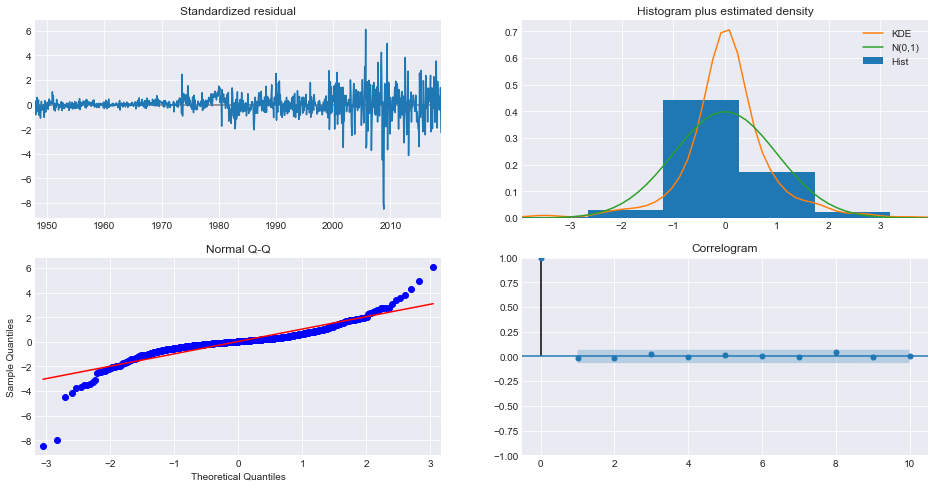

In [151]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [152]:
pred = results.get_prediction(start=pd.to_datetime("2000-01-01"), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.columns

Index(['lower CPI', 'upper CPI'], dtype='object')

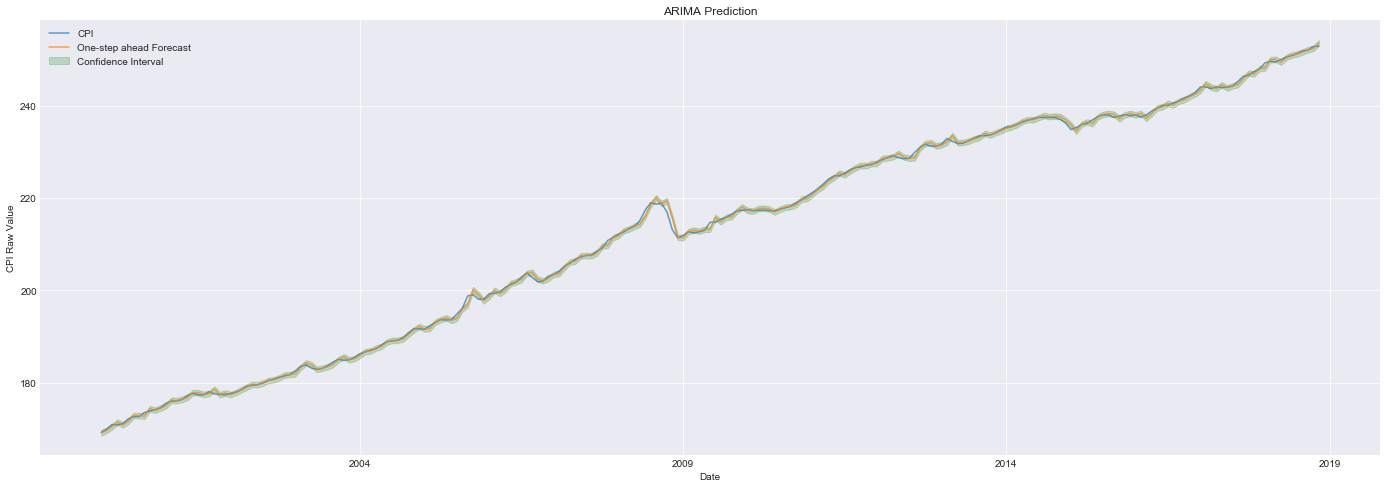

In [153]:
rcParams["figure.figsize"] = (24, 8)
ax = df[pd.to_datetime("2000-01-01"):].plot(label="observed", alpha=.7)
pred.predicted_mean.plot(ax=ax, label="One-step ahead Forecast", alpha=.7)
ax.fill_between(
    pred_ci.index,
    pred_ci["lower CPI"],
    pred_ci["upper CPI"],
    color="green",
    alpha=.2,
    label="Confidence Interval"
)
ax.set_xlabel("Date")
ax.set_ylabel("CPI Raw Value")
plt.title("ARIMA Prediction")
plt.legend()
plt.show()

In [154]:
predicted = pred.predicted_mean.values
observed = np.squeeze(df["2000-01-01":].values)
rmse = np.sqrt(np.mean(
    (predicted - observed) ** 2
))
print(rmse)

0.5359924510048801


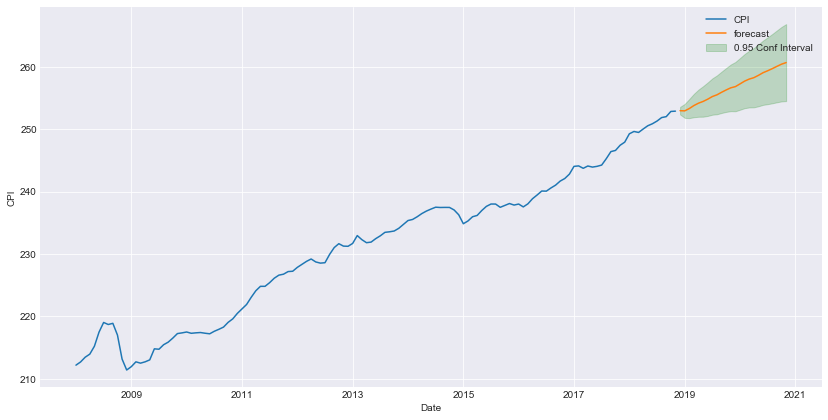

In [189]:
# Forecasting
alpha = 0.05
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int(alpha=alpha)

ax = df["2008-01-01":].plot(
    label="observed", figsize=(14, 7)
)
pred_uc.predicted_mean.plot(ax=ax, label="forecast")
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],  # Lower CI
    pred_ci.iloc[:, 1],  # Upper CI
    color="green",
    alpha=0.2,
    label=f"{1-alpha} Conf Interval"
)
ax.set_xlabel("Date")
ax.set_ylabel("CPI")

plt.legend()
plt.show()

,lower CPI,upper CPI
2018-12-01,252.345821,253.555520
2019-01-01,251.803180,254.033736
2019-02-01,251.756142,254.826816
2019-03-01,251.899893,255.650077
2019-04-01,251.974538,256.333301
2019-05-01,251.983924,256.881345
2019-06-01,252.107061,257.482160
2019-07-01,252.304546,258.127039
2019-08-01,252.375599,258.607208
2019-09-01,252.583278,259.211552
